In [ ]:
# Packages:

import os
import matplotlib.pyplot as plt

import pandas as pd
import dfm_tools as dfmt
# from dfm_tools.interpolate_grid2bnd  import open_prepare_dataset
# import hydrolib.core.dflowfm as hcdfm

: 

In [ ]:
# Model

lon_min, lon_max, lat_min, lat_max = -16, 14,  42, 65  # DCSM

model_name = 'model'

date_min = '2018-12-01' # for the .bc files
date_max = '2019-01-01'  
ref_date = '2017-12-01'

path_style = 'unix' # windows / unix

dir_output = r'P:\ltv-natuur-schelde-slib-waq\ecolmod\03_computations\boundary_conditions\hist\J2018\seawater'
dir_output_data = r'C:\Ocean\Work\Projects\2025\Schelde\Data\CMEMS'

In [ ]:
# poly_file = r'p:\11210020-fugromc-bsh\01-modelling\simulations\model_inputs\boundaries\extra_rand_dcsm_nocomments_removed_1st_point.pli'
# poly_file = r'p:\11210020-fugromc-bsh\01-modelling\simulations\model_inputs\boundaries\DCSM-FM_OB_all_20181108_nocomments.pli'
poly_file = r'P:\ltv-natuur-schelde-slib-waq\ecolmod\03_computations\boundary_conditions\hist\J2018\seawater\NE.pli'

# Check if actually need for extra_bnd. Is that not baltic? And used as river instead? 

In [ ]:
# generate new format external forcings file (*.ext): initial and open boundary condition
# ext_file_new = os.path.join(dir_output, f'{model_name}_new.ext')
# ext_new = hcdfm.ExtModel()

In [11]:
## Update the conversion dict:
conversion_dict = { # conversion is phyc in mmol/m3 to newvar in g/m3
                    'tracerbndOXY'        : {'ncvarname': 'o2',          'unit': 'g/m3', 'conversion': 32./1000.},
                    'tracerbndNO3'        : {'ncvarname': 'no3',         'unit': 'g/m3', 'conversion': 14./1000.},
                    'tracerbndPO4'        : {'ncvarname': 'po4',         'unit': 'g/m3', 'conversion': 30.97/1000.},
                    'tracerbndSi'         : {'ncvarname': 'si',          'unit': 'g/m3', 'conversion': 28.08/1000.},
                    'tracerbndPON1'       : {'ncvarname': 'phyc',        'unit': 'g/m3', 'conversion': 2. * (16./106.) * (14./1000.)}, # Caution: this empirical relation might not be applicable to your use case
                    'tracerbndPOP1'       : {'ncvarname': 'phyc',        'unit': 'g/m3', 'conversion': 2. * (1./106.) * (30.97/1000.)}, # Caution: this empirical relation might not be applicable to your use case
                    'tracerbndPOC1'       : {'ncvarname': 'phyc',        'unit': 'g/m3', 'conversion': 2. * (12./1000.)}, # Caution: this empirical relation might not be applicable to your use case
                    'tracerbndDON'        : {'ncvarname': 'phyc',        'unit': 'g/m3', 'conversion': (19./225.) * (91.8 / 8.2) * 2. * (14./1000.)}, # Caution: this empirical relation might not be applicable to your use case
                    'tracerbndDOP'        : {'ncvarname': 'phyc',        'unit': 'g/m3', 'conversion': (1./225.) * (91.8 / 8.2) * 2. * (30.97/1000.)}, # Caution: this empirical relation might not be applicable to your use case
                    'tracerbndDOC'        : {'ncvarname': 'phyc',        'unit': 'g/m3', 'conversion': (91.8 / 8.2) * 2. * (12./1000.)}, # Caution: this empirical relation might not be applicable to your use case
                    'tracerbndOpal'       : {'ncvarname': 'phyc',        'unit': 'g/m3', 'conversion': 0.5 * 0.13 * 28.08/1000}, # Caution: this empirical relation might not be applicable to your use case
                    'tracerbndTIC'        : {'ncvarname': 'tic',         'unit': 'g/m3', 'conversion': 1.}, 
                    'tracerbndALKA'       : {'ncvarname': 'alka',        'unit': 'g/m3', 'conversion': 1.}, 
                    # 'salinitybnd'         : {'ncvarname': 'so'},          #'1e-3'
                    # 'temperaturebnd'      : {'ncvarname': 'thetao'},      #'degC'
                    # 'ux'                  : {'ncvarname': 'uo'},          #'m/s'
                    # 'uy'                  : {'ncvarname': 'vo'},          #'m/s'
                    # 'waterlevelbnd'       : {'ncvarname': 'zos'},         #'m' #steric
                    # 'tide'                : {'ncvarname': ''},            #'m' #tide (dummy entry)
                    }


In [12]:
list_quantities = [#'tracerbndOXY','tracerbndNO3','tracerbndPO4','tracerbndSi', 'tracerbndPON1', 'tracerbndPOP1',
                   #'tracerbndPOC1', 'tracerbndDON', 'tracerbndDOP', 'tracerbndDOC', 'tracerbndOpal', 
                   'tracerbndTIC', 'tracerbndALKA']

dir_pattern = os.path.join(dir_output_data, 'cmems_{ncvarname}_*.nc')

ext_new = dfmt.cmems_nc_to_bc(ext_new=ext_new,
                              refdate_str=f'minutes since {ref_date} 00:00:00 +00:00',
                              dir_output=dir_output,
                              list_quantities=list_quantities,
                              tstart=date_min,
                              tstop=date_max, 
                              file_pli=poly_file,
                              dir_pattern=dir_pattern)

processing quantity: tracerbndTIC


KeyError: "quantity 'tracerbndTIC' not in conversion_dict, (case sensitive) options are: ['tracerbndOXY', 'tracerbndNO3', 'tracerbndPO4', 'tracerbndSi', 'tracerbndGreen', 'tracerbndPON1', 'tracerbndPOP1', 'tracerbndPOC1', 'tracerbndDON', 'tracerbndDOP', 'tracerbndDOC', 'tracerbndOpal', 'salinitybnd', 'temperaturebnd', 'ux', 'uy', 'waterlevelbnd', 'tide']"

In [ ]:
# save new ext file
ext_new.save(filepath=ext_file_new ,path_style=path_style)

# check unix filepath and if need the other version.. 

>> reading coastlines: 1.80 sec
>> reading coastlines: 1.35 sec


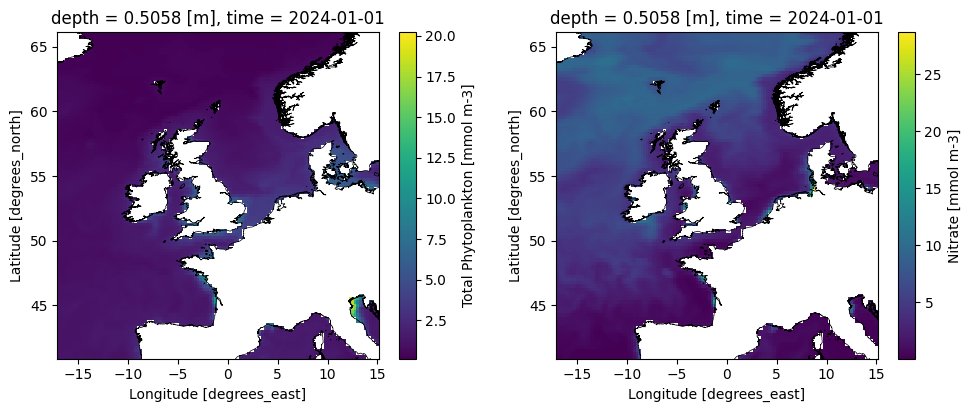

In [13]:
# plot downloaded CMEMS data
import xarray as xr
file_cmems = os.path.join(dir_output_data,'*.nc')
ds_cmems = xr.open_mfdataset(file_cmems)
ds_cmems

# plot
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,4))
ds_cmems.phyc.isel(time=0, depth=0).plot(ax=ax1)
dfmt.plot_coastlines(ax=ax1)
ds_cmems.no3.isel(time=0, depth=0).plot(ax=ax2)
dfmt.plot_coastlines(ax=ax2)
fig.tight_layout()

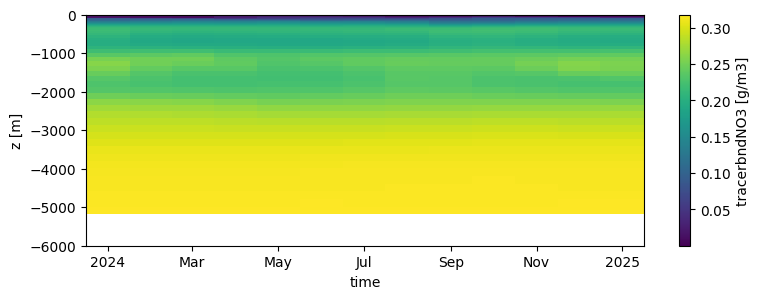

In [ ]:
# plot interpolated CMEMS data (boundary conditions in .bc)
from pathlib import Path
pli_basename = Path(poly_file).stem
file_bc_no3 = os.path.join(dir_output, f'tracerbndNO3_CMEMS_{pli_basename}.bc')
bc_obj_no3 = hcdfm.ForcingModel(file_bc_no3)
forcing_xr_no3 = dfmt.forcinglike_to_Dataset(bc_obj_no3.forcing[20], convertnan=True)  # sel pli point

# plot
fig, (ax1) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(9,3))
forcing_xr_no3['tracerbndNO3'].T.plot(ax=ax1)